In [33]:
import pandas as pd
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

In [34]:
with open(r"words.txt", encoding="utf-8") as f:
    wordle_script = f.read()

raw_words = wordle_script.split(',')
wordle_words = []
for raw_word in raw_words:
    word = raw_word.strip('"')
    wordle_words.append(word)

curated_words = wordle_words[:2315]


In [35]:
flw_with_freq = []  # flw = five letter words
for line in urllib.request.urlopen(r'http://norvig.com/google-books-common-words.txt'):
    line = (line.decode('utf-8')).split('\t')
    word = line[0].lower()
    freq = line[1].split('\n')[0]
    if len(word) == 5:
        flw_with_freq.append((word, freq))

In [38]:
words_with_freq = pd.DataFrame(wordle_words, columns=['w'])
words_with_freq['in_wordle'] = words_with_freq['w'].apply(lambda x: x in wordle_words)
words_with_freq['in_wordle_curated'] = words_with_freq['w'].apply(lambda x: x in curated_words)
flwfreqdf = pd.DataFrame(flw_with_freq, columns=['w', 'freq'])
words_with_freq = words_with_freq.merge(right=flwfreqdf, left_on='w', right_on='w', how='outer')
words_with_freq.loc[:, ['in_wordle', 'in_wordle_curated']] = words_with_freq.loc[:, ['in_wordle', 'in_wordle_curated']].replace(np.nan, False)
words_with_freq.set_index('w', inplace=True)
words_with_freq['freq'] = words_with_freq['freq'].astype('float64')
words_with_freq.to_csv(r'./data/processed/wordle_google_freq_word_list.csv')
words_with_freq

,in_wordle,in_wordle_curated,freq
w,,,
cigar,True,True,3877425.0
rebut,True,True,508399.0
sissy,True,True,548761.0
humph,True,True,274977.0
awake,True,True,9037710.0
...,...,...,...
kempf,False,False,100070.0
sakha,False,False,100063.0
ekiti,False,False,100063.0


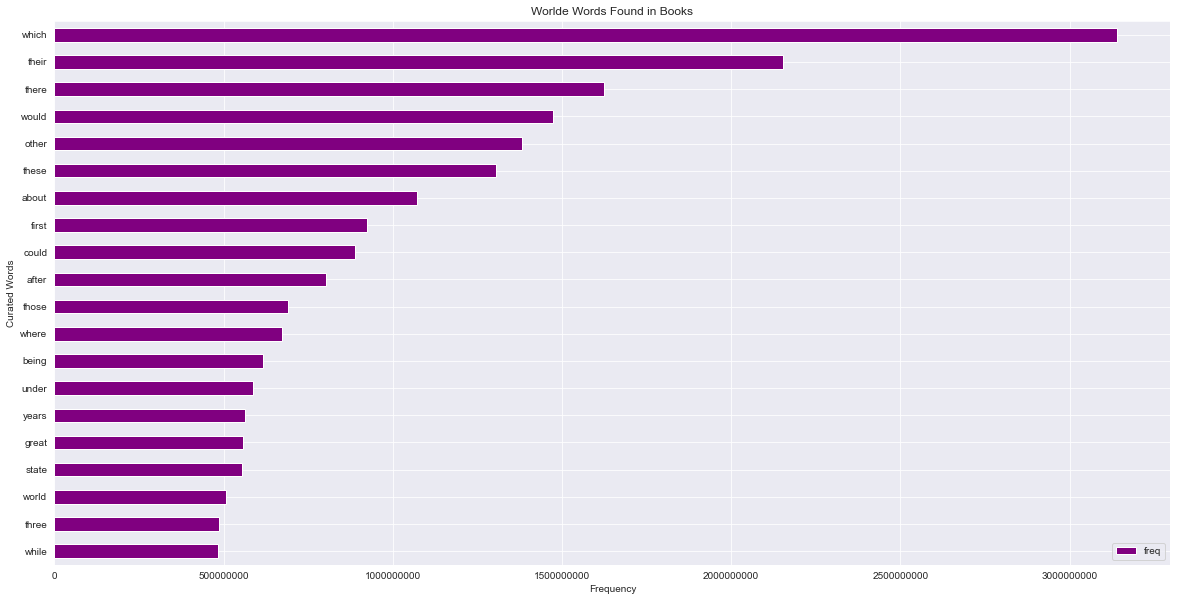

In [39]:
# Plot horizontal bar graph
temp = words_with_freq.copy()
temp.drop(['in_wordle', 'in_wordle_curated'], axis = 1, inplace = True)
temp.sort_values(by='freq', ascending=False, inplace = True)
temp = temp.head(20)

fig, ax = plt.subplots(figsize=(20,10))
temp.sort_values(by='freq').plot.barh(y='freq', ax=ax, color="purple")
ax.set_title("Worlde Words Found in Books")
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.set_xlabel("Frequency")
ax.set_ylabel("Curated Words")
plt.show()






In [40]:
!jupyter nbconvert 1_milanjoshi*.ipynb --to python

[NbConvertApp] Converting notebook 1_milanjoshi_preliminary_analysis_freqOfWords.ipynb to python
[NbConvertApp] Writing 2119 bytes to 1_milanjoshi_preliminary_analysis_freqOfWords.py
